In [8]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, PrecisionRecallDisplay
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

import builtins

def print(*args, **kwargs):
    kwargs["sep"] = ""
    return builtins.print(*args, **kwargs)


plt.rcParams["figure.figsize"] = (6, 4)
# Change to stix
plt.rcParams["font.family"] = "STIXGeneral"

import warnings
warnings.filterwarnings("ignore")

### Lab Task 1

   cement   slag  water  fineagg  coarseagg
0   540.0    0.0  162.0    676.0     1040.0
1   540.0    0.0  162.0    676.0     1055.0
2   332.5  142.5  228.0    594.0      932.0
3   332.5  142.5  228.0    594.0      932.0
4   198.6  132.4  192.0    825.5      978.4

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64


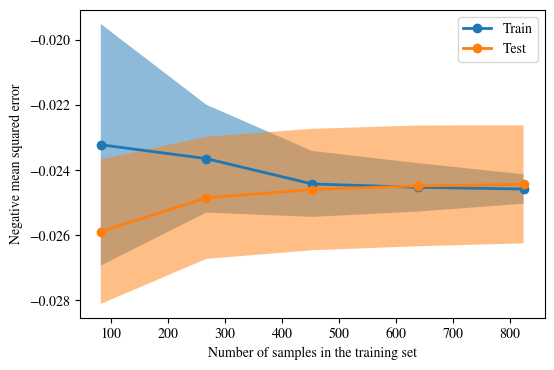

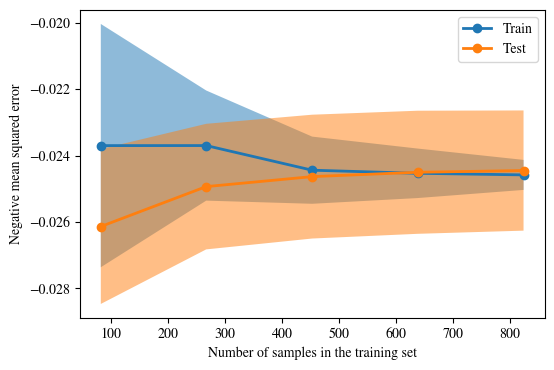

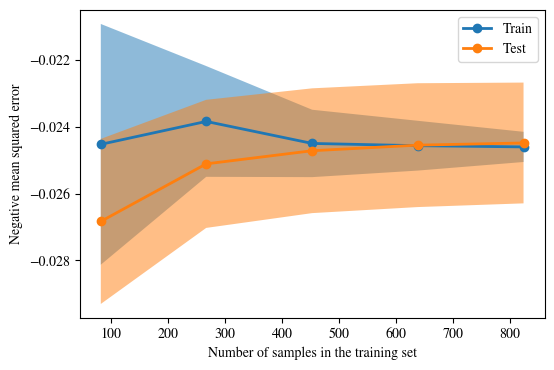

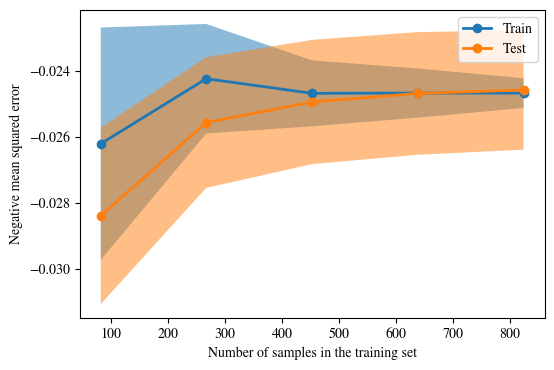

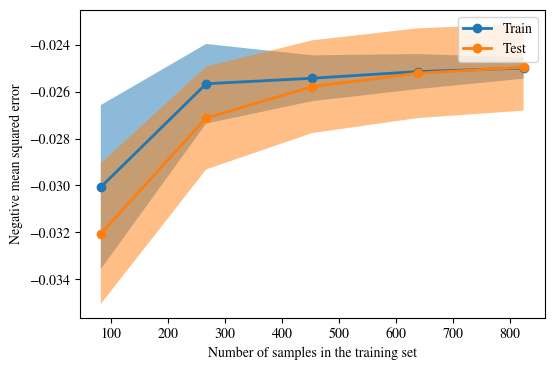

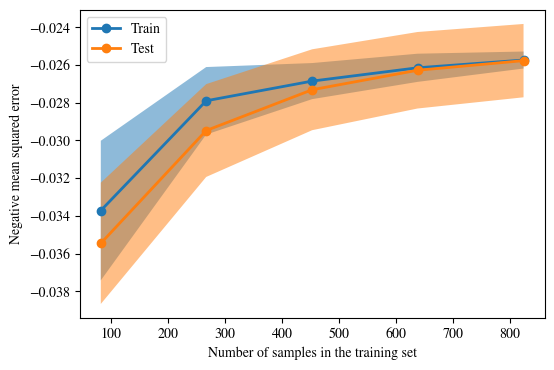

In [9]:
"""
Download a dataset containing at least 5 feature columns and a label column containing continuous data. Use functions from Sci-kit learn to train a model using linear regression. You will need to split your dataset into training and test portions. Vary the step size and regularization parameters to get at least 6 plots of the training loss and test loss. Lastly, save the weights of the best trained model and use them to make at least five predictions.

Provide the codes and all of the relevant screenshots of your work. Also, give brief explanation of the functions you are using in your codes.
"""

# Load the dataset
data = pd.read_csv("concrete_data.csv")
features = ["cement", "slag", "water", "fineagg", "coarseagg"]
label = "strength"
X = data[features]
y = data[label]

print(X.head())
print("\n", y.head())

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the dataset into training and test portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

alpha = [10, 5, 2, 1, 0.5, 0.1]
alpha.sort()

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o", "linewidth": 2},
    "std_display_style": "fill_between",
    "scoring": "neg_mean_squared_error",
}

for a in alpha:
    # Train the model using linear regression
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)

    # Plot the training and test loss
    LearningCurveDisplay.from_estimator(
        model,
        **common_params,
    )

In [10]:
# Save the weights of the best trained model
weights = model.coef_
# print("\nWeights: ", weights)
np.save("weights.npy", weights)

# Load the weights to sklearn model
weights = np.load("weights.npy")
# model = Ridge(alpha=0.1)
# model.coef_ = weights

# Make predictions
predictions = model.predict(X_test)

### Lab Task 2

   Glucose  BloodPressure  SkinThickness   BMI  DiabetesPedigreeFunction
0      148             72             35  33.6                     0.627
1       85             66             29  26.6                     0.351
2      183             64              0  23.3                     0.672
3       89             66             23  28.1                     0.167
4      137             40             35  43.1                     2.288

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Mean squared error: 0.19480519480519481


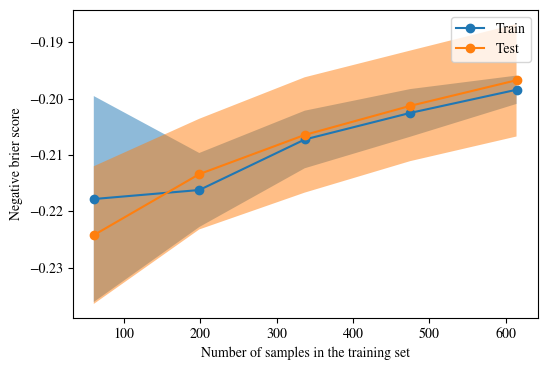

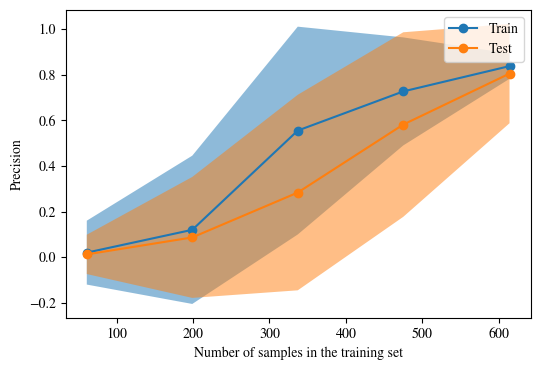

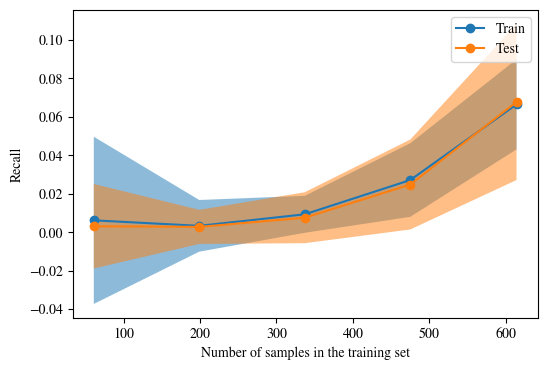

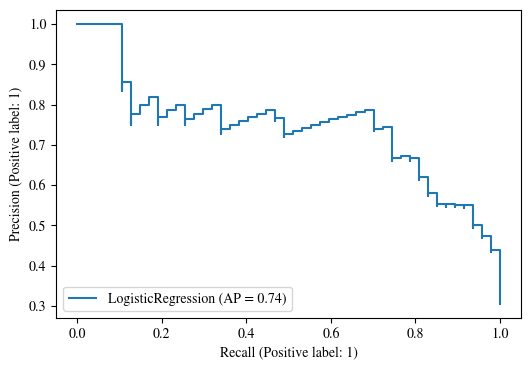

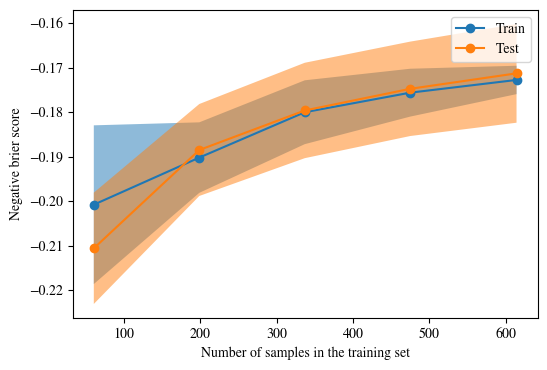

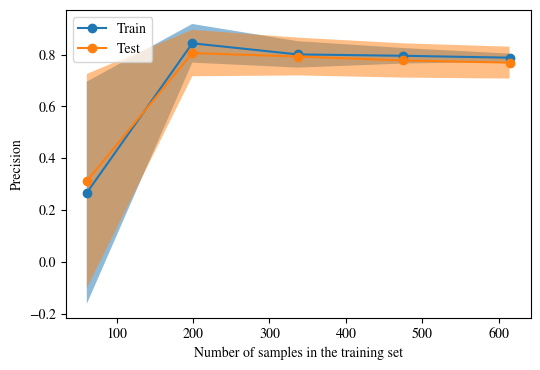

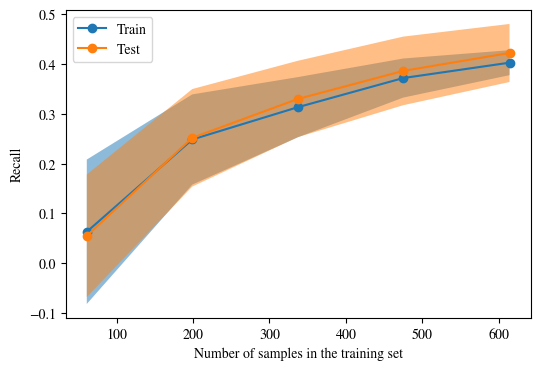

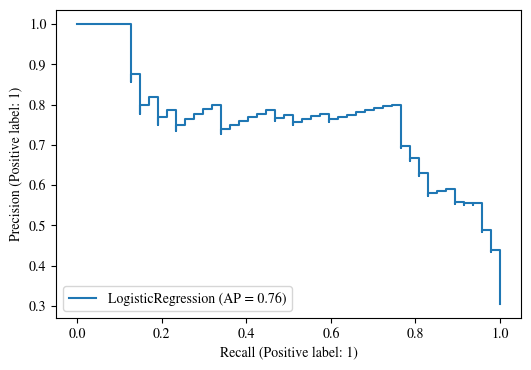

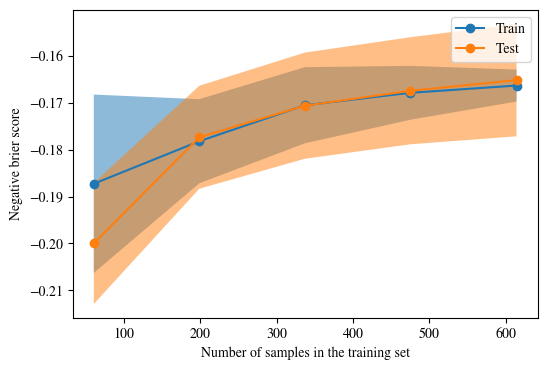

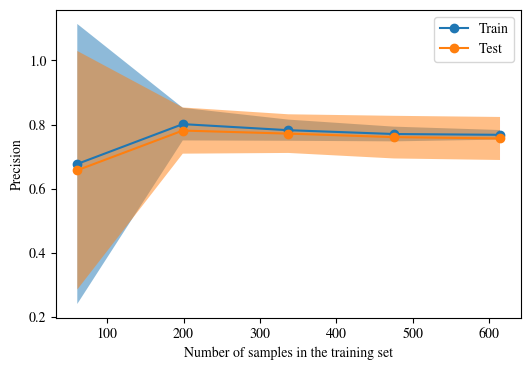

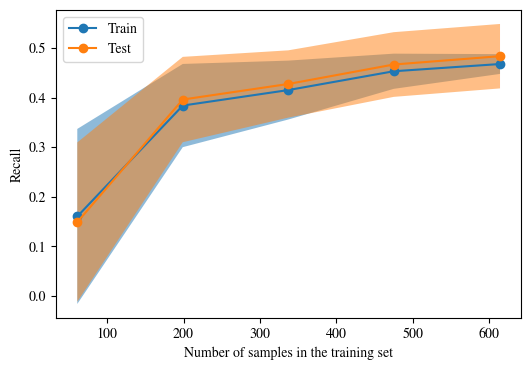

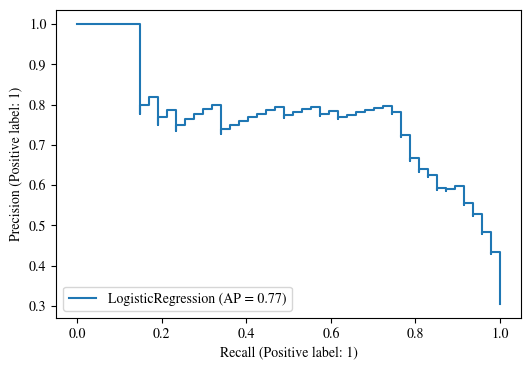

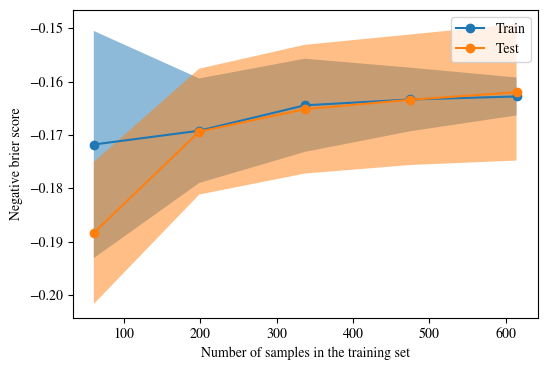

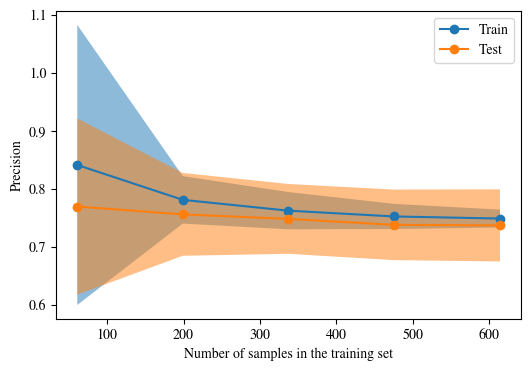

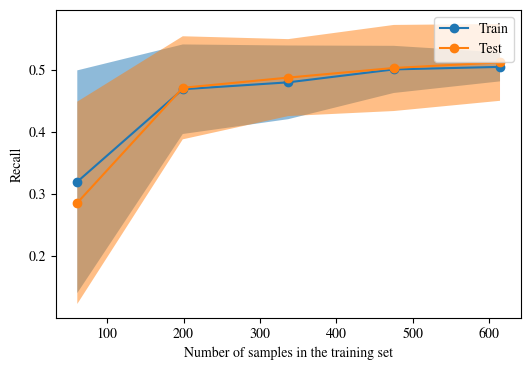

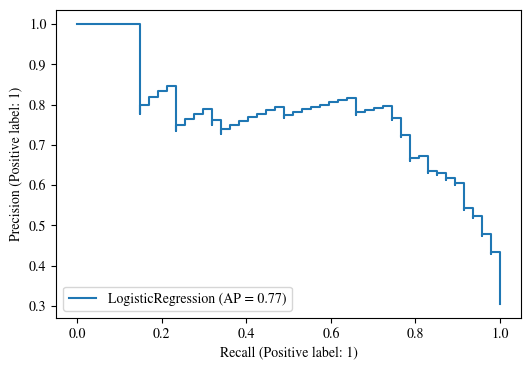

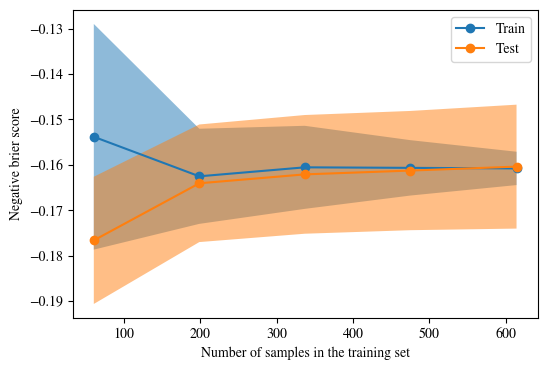

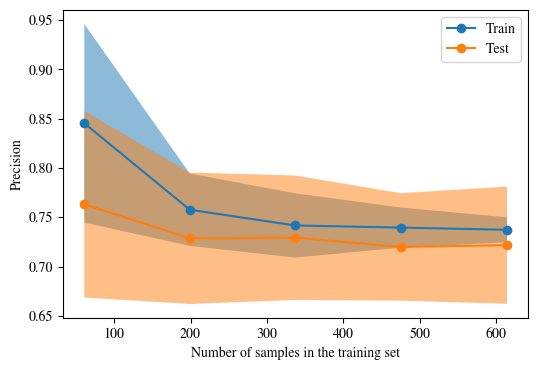

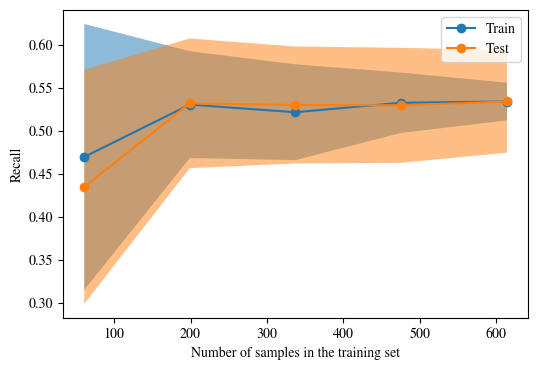

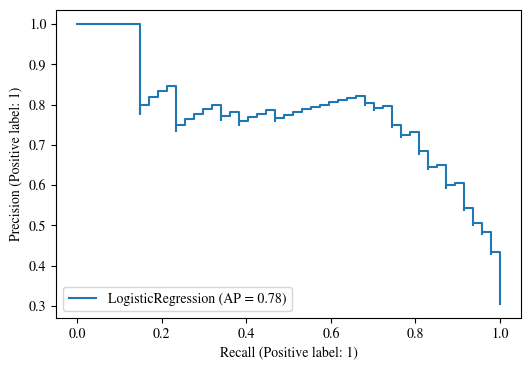

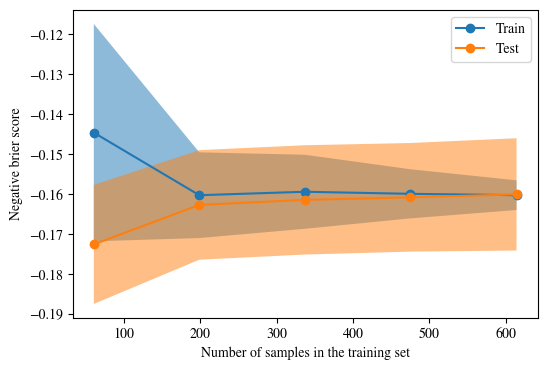

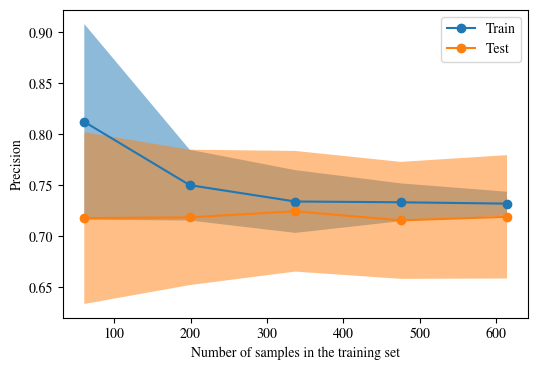

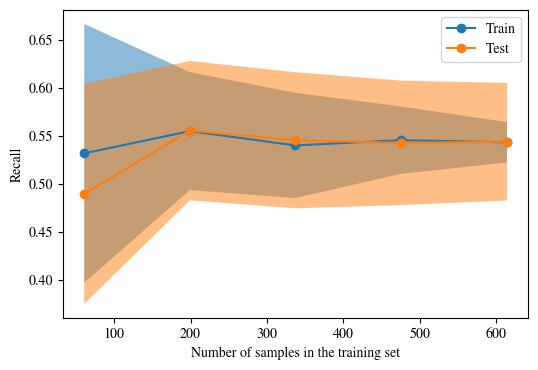

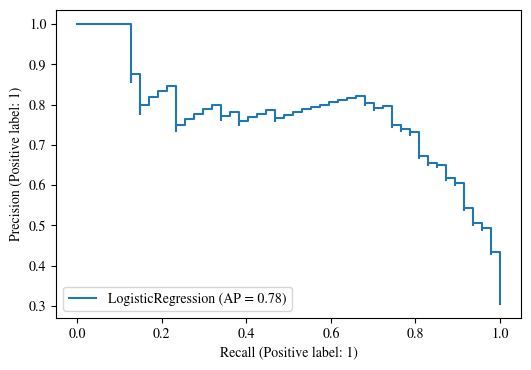

In [11]:
"""
Download a dataset containing at least 5 feature columns and a label column containing discrete data. Use functions from Sci-kit learn to train a model using logistic regression. You will need to split your dataset into training and test portions. Vary the step size and regularization parameters to get at least 6 models of the training. For each model, plot the training loss (vs. epochs), test loss (vs. epochs), precision (vs. epochs) and recall (vs. epochs). Additionally, plot the precision-recall plots for each trained model.

Lastly, save the weights of the best trained model and use them to make at least five predictions. Make a scatter plot for each of your prediction. For this, you will need to show the all of the dataset examples with their labeled classes. Your prediction must be shown as a distinct point in the scatter plots.

Provide the code and all of the relevant screenshots of your work. Also, give brief explanation of the functions you are using in your codes.
"""

# Load the dataset
data = pd.read_csv("diabetes.csv")
features = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "BMI",
    "DiabetesPedigreeFunction",
]
label = "Outcome"
X = data[features]
y = data[label]

print(X.head())
print("\n", y.head())

# Feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the dataset into training and test portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
}

alpha = [10, 5, 2, 1, 0.5, 0.1]
alpha.sort()

for a in alpha:
    model = LogisticRegression(C=a)
    model.fit(X_train, y_train)
    
    LearningCurveDisplay.from_estimator(
        model,
        **common_params,
        scoring="neg_brier_score",
    )
    LearningCurveDisplay.from_estimator(
        model,
        **common_params,
        scoring="precision",
    )
    LearningCurveDisplay.from_estimator(
        model,
        **common_params,
        scoring="recall",
    )
    PrecisionRecallDisplay.from_estimator(
        model,
        X_test,
        y_test
    )


# Save the weights of the best trained model
weights = model.coef_
# print("\nWeights: ", weights)
np.save("weights.npy", weights)

# Load the weights to sklearn model
weights = np.load("weights.npy")
# model = Ridge(alpha=0.1)
# model.coef_ = weights

# Make predictions
predictions = model.predict(X_test)
print("\nMean squared error: ", mean_squared_error(y_test, predictions))

### Lab Task 3

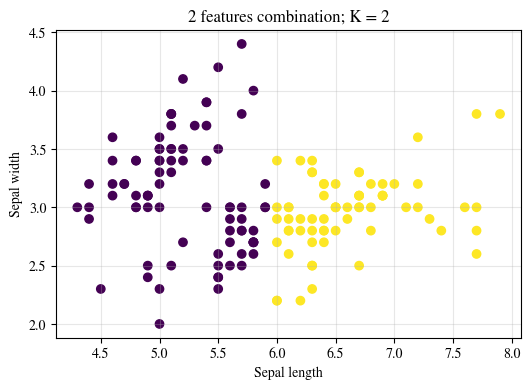

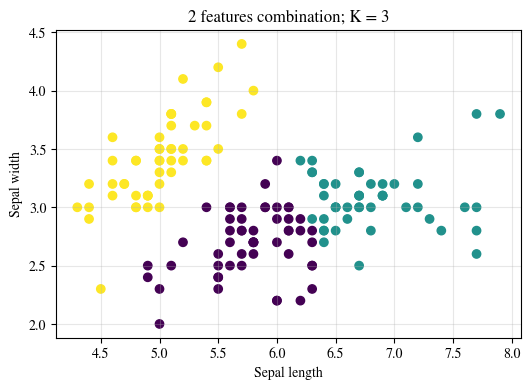

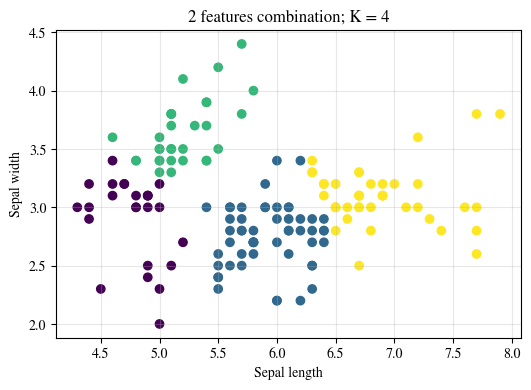

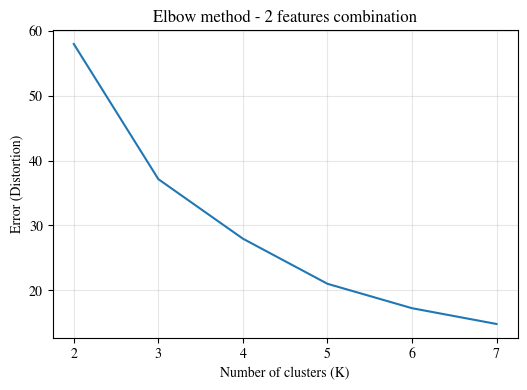

In [12]:
"""
Download a dataset containing at least 4 feature columns. Use functions from Sci-kit learn to perform K-means clustering on the following cases:

•	2 features combination
•	3 features combination
•	4 features combination

For each of the above, perform clustering from k = 2 to K clusters (K is up to your choice). For each combination case, make at least 3 cluster plots. Also, make a graph of cost vs. K for all of the 3 combination cases.  Use the elbow method to determine the best number of clusters in each case.

Provide the code and all of the relevant screenshots of your work. Also, give brief explanation of the functions you are using in your codes.
"""

# Load the dataset
data = pd.read_csv("iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = data[features]
y = data["species"]

k_range = range(2, 8)

# 2 features combination; graph of cost vs. K; elbow method; 3 cluster plots
X2 = X[["sepal_length", "sepal_width"]]
distortions = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    distortions.append(model.inertia_)
    y_pred = model.predict(X2)

    if k <= 4:
        plt.scatter(X2["sepal_length"], X2["sepal_width"], c=y_pred)
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.title(f"2 features combination; K = {k}")
        plt.grid(alpha=0.3)
        plt.show()

plt.plot(k_range, distortions)
plt.xlabel("Number of clusters (K)")
# change x axis to integer
plt.xticks(k_range)
plt.ylabel("Error (Distortion)")
plt.title("Elbow method - 2 features combination")
plt.grid(alpha=0.3)
plt.show()

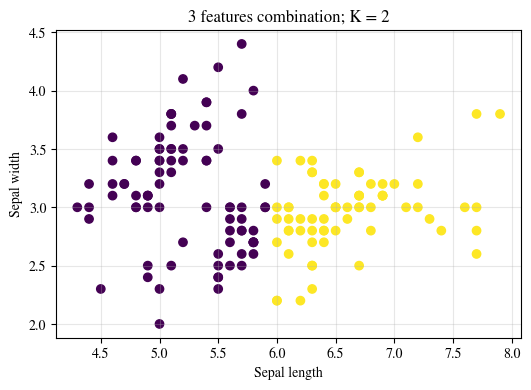

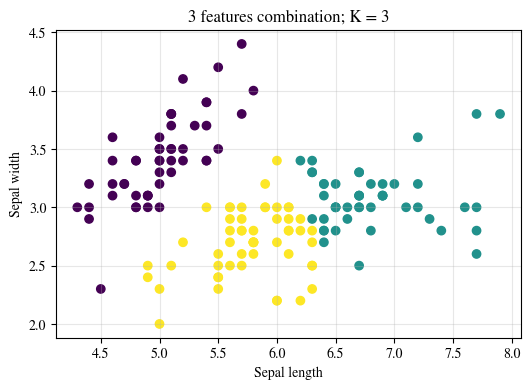

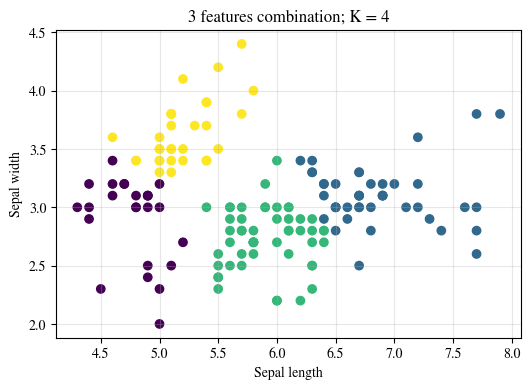

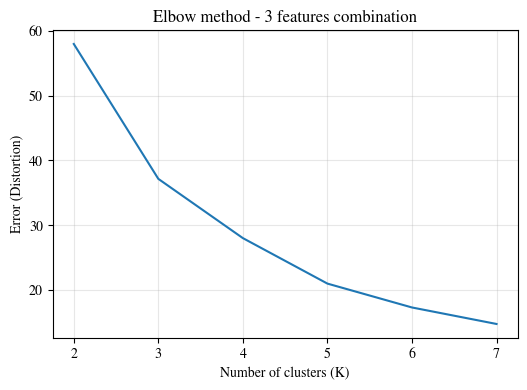

In [13]:
# 2 features combination; graph of cost vs. K; elbow method; 3 cluster plots
X3 = X[["sepal_length", "sepal_width", "petal_length"]]
distortions = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    distortions.append(model.inertia_)
    y_pred = model.predict(X2)

    if k <= 4:
        plt.scatter(X2["sepal_length"], X2["sepal_width"], c=y_pred)
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.title(f"3 features combination; K = {k}")
        plt.grid(alpha=0.3)
        plt.show()

plt.plot(k_range, distortions)
plt.xlabel("Number of clusters (K)")
# change x axis to integer
plt.xticks(k_range)
plt.ylabel("Error (Distortion)")
plt.title("Elbow method - 3 features combination")
plt.grid(alpha=0.3)
plt.show()

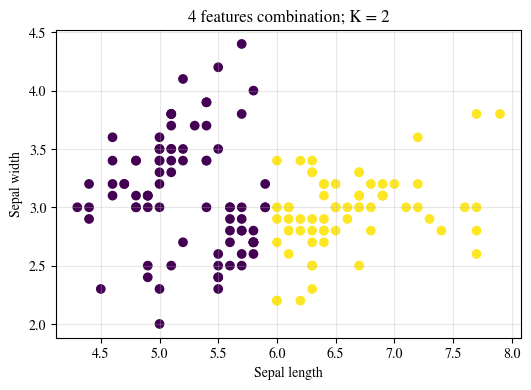

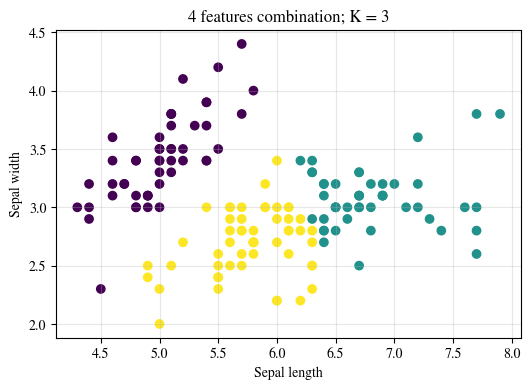

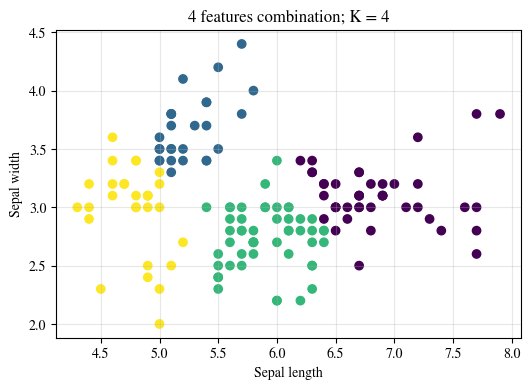

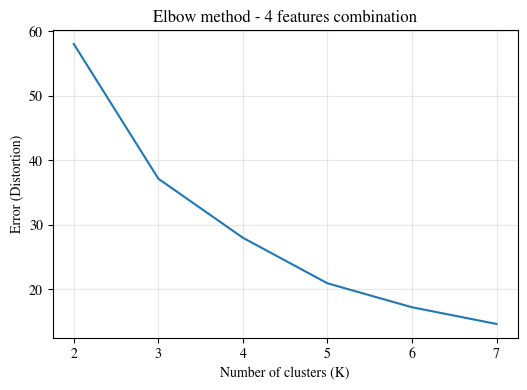

In [14]:
# 2 features combination; graph of cost vs. K; elbow method; 3 cluster plots
X4 = X[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
distortions = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    distortions.append(model.inertia_)
    y_pred = model.predict(X2)

    if k <= 4:
        plt.scatter(X2["sepal_length"], X2["sepal_width"], c=y_pred)
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.title(f"4 features combination; K = {k}")
        plt.grid(alpha=0.3)
        plt.show()

plt.plot(k_range, distortions)
plt.xlabel("Number of clusters (K)")
# change x axis to integer
plt.xticks(k_range)
plt.ylabel("Error (Distortion)")
plt.title("Elbow method - 4 features combination")
plt.grid(alpha=0.3)
plt.show()